In [2]:
%run Proyecto_idDrRecursos.ipynb

## **ESTUDIO - PROBABILIDAD**

Varianza es una medida de dispersión que indica qué tan dispersos están los valores de un conjunto de datos con respecto a su media

* **Media**: Es la suma de todos los valores en un conjunto de datos dividia por un número de elementos en ese conjunto. Se representa comúnmente como **&mu;**(para una poblacion) **x&#x0305;**(para una muestra).
* **Desviación respecto a la media**: Es la diferencia entra cada valor de datos y la media del conjunto.
* **Cuadrados de desviaciones**: Para calcular la varianza, tomamos cada desviación con respecto a la media y la elevamos al cuadrado. Esto se hace para eliminar los efectos de las desviaciones positivas y negativas que se cancelarían entre sí si se sumaran directamente.
* **Varianza**: Es el promedio de los cuadrados de las desviaciones respecto a la media. Se denota comúnmente como **&sigma;²**(para una población) o **s²**(para una muestra)
* **Desviación estandar**: Es la raiz cuadrada de la varianza. Se utiliza a menudo como una medida de dispersión más interpretable que la varianza, ya que tiene las mismas unidades que los datos originales. Se denota comúnmente como **&sigma;**(para una población) o **s**(para una muestra)


**1.-** Para una población:
$$ \sigma² = \frac{1}{N} \sum_{i=1}^{n}(x_i - µ)²  $$ 
Donde
* N es el tamaño de la población
* x<sub>i</sub> son los valores indivuales en la población 
* µ es la medida de la población 

**2.-** Para una muestra:
$$ s² = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})²$$

In [3]:
datos = dict(
    A = [23, 45, 23, 52, 33],
)

#Creamos un DataFrame con los datos
df = pd.DataFrame(datos)

#Calculamos la media
media = df.mean()

#Calculamos la desviación respecto a la media
desviacion_r_m = df - media 

#Calculamos los cuadrados de las desviaciones 
cuadrados_desviaciones = desviacion_r_m ** 2

#Calculamos la varianza 
varianza = cuadrados_desviaciones.mean()

#Calculamos la desviación estándar 
desviacion_estandar = np.sqrt(varianza)
resultado = pd.DataFrame({
    'Valores': df['A'],
    'Desviación_r_m': desviacion_r_m['A'],
    'Cuadrados_desviaciones': cuadrados_desviaciones['A'],
}, index=df.index)

print(f"{resultado}\nVarianza:{float(varianza.iloc[0])}\nDesviación estandar:{float(desviacion_estandar.iloc[0])}")

   Valores  Desviación_r_m  Cuadrados_desviaciones
0       23           -12.2                  148.84
1       45             9.8                   96.04
2       23           -12.2                  148.84
3       52            16.8                  282.24
4       33            -2.2                    4.84
Varianza:136.16
Desviación estandar:11.668761716651858


La covarianza es una medida que indica la relación entre dos variables aleatorias. Mide cómo cambian juntas dos variables. 
* **1.- Variables aleatorias**: Son variables cuyos valores dependen de resultado de un fenómeno aleatorio. Por ejemplo, la altura de una personna o la temperatura de un dia dado son variables aleatorias.

* **2.- Covarianza**: Es una medida de la relación linea entre dos variables aleatorias. Indica la tendencia de estas variables a varias juntas. Si la covarianza es positiva, significa que las variables tienden a aumentar o disminuir juntas. Si es negativa, significa que cuando una variable aumenta, la otra tiende a disminuir. Si es cercana a cero, indica que no hay relación lineal fuerte entre las variables 

* **3.-Fórmula de covarianza**: Para dos variables aleatorias X e Y, la covarianza calcula como la media del producto de las desviaciones de cada variable respecto a su media: 
$$ Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})

* n es el número de observaciones
* x<sub>i</sub> e y<sub>i</sub> son los valores de observación 
* x&#x0305; y y&#x0305; son las medidas de X e Y respectivamente

Pero tambien tenemos una formula computacional para la covarianza 
$$ Cov(X,Y) = \frac{\sum x_iy_i - \frac{(\sum x_i)(\sum y_i)}{n}}{n - 1} $$

* **4.-Interpretación**: La magnitud de la convarianza no es fácilmente interpretable por si sola, ya que depende de las unidades de las variables. Por lo tanto, es más comúnmente utilizada en relación con la magnitud de las desviaciones estándar de las varibles, lo que nos lleva al coeficiente de correlación.
* **5.-Coeficiente de correlación**: Es una medida estandarizada de la relación lineal entre dos variables, y se calcula como la covarianza dividida por por el producto de las desviaciones estándar de las dos variables:

$$ Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_x \cdot \sigma_y}

Donde:
* &sigma;<sub>X</sub> y &sigma;<sub>Y</sub> son las desviaciones estándar de X e Y respectivamente.
* Y los valores que puede tomar varian desde -1 hasta 1

Covarianza:14.895880266477
Coeficiente de correlación:1.005555102742833


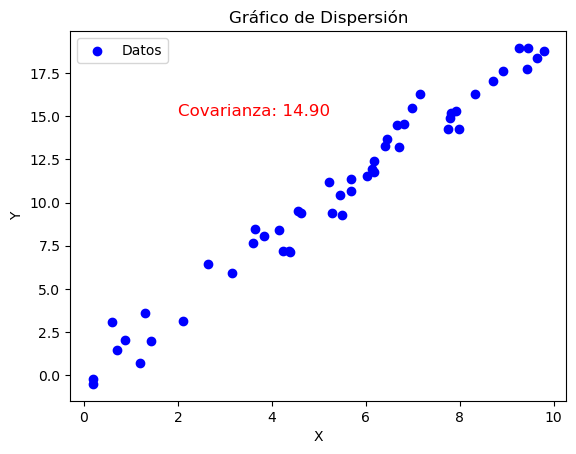

In [4]:
# Creamos datos de ejemplo
np.random.seed(0)
x = np.random.rand(50) * 10  # Variable X
y = 2 * x + np.random.normal(0, 1, 50)  # Variable Y con relación lineal con X

# Creamos un DataFrame con los datos
df = pd.DataFrame({'X': x, 'Y': y})

# Calculamos la covarianza y coeficiente de correlación 
#--------------Manual
covariance = df['X'].cov(df['Y'])
mean_x = np.mean(x)
mean_y = np.mean(y)
varianza_x = np.sqrt(((x - mean_x) ** 2).mean())
varianza_y = np.sqrt(((y - mean_y) ** 2).mean())
x -= mean_x
y -= mean_y
xy = x * y
cov_xy = np.sum(xy) / (len(xy) - 1)
covariance_xy = df['X'].cov(df['Y'])
r  = covariance_xy / (varianza_x * varianza_y)
print(f"Covarianza:{cov_xy}")
print(f"Coeficiente de correlación:{r}")

# Graficamos los datos de dispersión
plt.scatter(df['X'], df['Y'], color='blue', label='Datos')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión')
plt.legend()

# Mostramos la covarianza en el gráfico
plt.text(2, 15, f'Covarianza: {covariance:.2f}', fontsize=12, color='red')

# Mostramos el gráfico
plt.show()

Covarianza:-15.360723134042107
Coeficiente de correlación:-1.0064223443839382


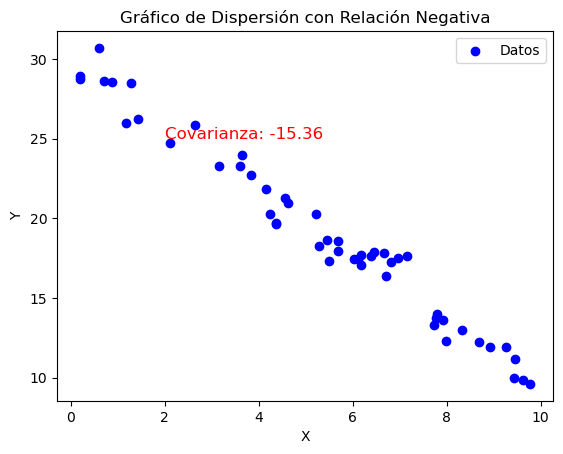

In [5]:
# Creamos datos de ejemplo con relación negativa
np.random.seed(0)
x = np.random.rand(50) * 10  # Variable X
y = 30 - 2 * x + np.random.normal(0, 1, 50)  # Variable Y con relación negativa con X

# Creamos un DataFrame con los datos
df = pd.DataFrame({'X': x, 'Y': y})

# Calculamos la covarianza
#--------------Manual
covariance = df['X'].cov(df['Y'])
mean_x = np.mean(x)
mean_y = np.mean(y)
varianza_x = np.sqrt(((x - mean_x)**2).mean())
varianza_y = np.sqrt(((y - mean_y)**2).mean())
x -= mean_x
y -= mean_y
xy = x * y
cov_xy = np.sum(xy) / (len(xy) - 1)
#-------------Metodo 
covariance = df['X'].cov(df['Y'])
#------------Coeficiente de correlación 
r = covariance / (varianza_x * varianza_y)

print(f"Covarianza:{cov_xy}")
print(f"Coeficiente de correlación:{r}")

# Graficamos los datos de dispersión
plt.scatter(df['X'], df['Y'], color='blue', label='Datos')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión con Relación Negativa')
plt.legend()

# Mostramos la covarianza en el gráfico
plt.text(2, 25, f'Covarianza: {covariance:.2f}', fontsize=12, color='red')

# Mostramos el gráfico
plt.show()

Covarianza:-0.7090730595582074
Coeficiente de correlación:-0.09006636017066652


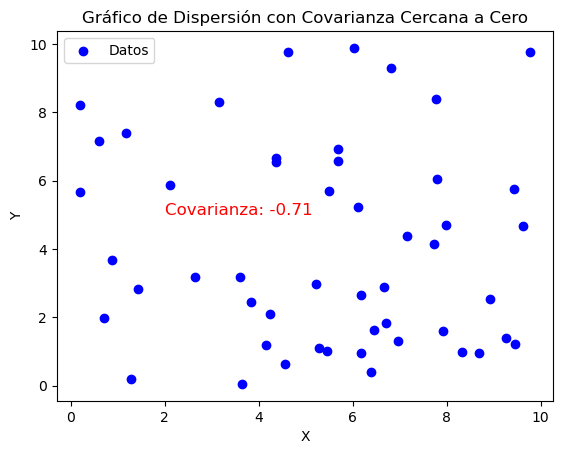

In [6]:
# Creamos datos de ejemplo sin relación lineal
np.random.seed(0)
x = np.random.rand(50) * 10  # Variable X
y = np.random.rand(50) * 10  # Variable Y sin relación con X

# Creamos un DataFrame con los datos
#----------------Manual
df = pd.DataFrame({'X': x, 'Y': y})
mean_x = np.mean(x)
mean_y = np.mean(y)
varianza_x = np.sqrt(((x - mean_x)**2).mean())
varianza_y = np.sqrt(((y - mean_y)**2).mean())
x -= mean_x
y -= mean_y
xy = x * y
cov_xy = np.sum(xy) / (len(xy) - 1)
#---------------Metodo 
covariance = df['X'].cov(df['Y'])
r = covariance / (varianza_y * varianza_x)

print(f"Covarianza:{cov_xy}")
print(f"Coeficiente de correlación:{r}")

# Calculamos la covarianza
covariance = df['X'].cov(df['Y'])

# Graficamos los datos de dispersión
plt.scatter(df['X'], df['Y'], color='blue', label='Datos')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión con Covarianza Cercana a Cero')
plt.legend()

# Mostramos la covarianza en el gráfico
plt.text(2, 5, f'Covarianza: {covariance:.2f}', fontsize=12, color='red')

# Mostramos el gráfico
plt.show()

Dada una recta que tiene una intersección en un punto **b** en el eje y con un incremento proporcional a tenemos lo siguiente:
$$ y = ax + b $$
$$ b = r\frac{s_y}{s_x} $$
y 
$$ a = \bar{y} - b\bar{x} $$ 
la recta de regresión de mínimos cuadrados es: 
$$ y = ax + b $$


In [7]:
x = np.random.rand(50) * 10  # Variable X
y = 30 - 2 * x + np.random.normal(0, 1, 50)  # Variable Y con relación negativa con X
df = pd.DataFrame({'X':x,'Y':y})
covariance1 = df['X'].cov(df['X'])
covariance2 = df['Y'].cov(df['Y'])
covariance3 = df['X'].cov(df['Y'])
print(covariance1)
print(covariance2)
print(covariance3)

6.12150753167867
25.075378925136235
-12.156625048687747


**¿Que ocurre al realizar el calculo de la covarianza de x sobre si mismo?**
$$ Cov(X,X) = \frac{\sum_{i=1}^{n}(X - \bar{X})(X - \bar{X})}{n} $$
$$ Cov(X,X) = \frac{\sum_{i=1}^{n}(X - \bar{X})²}{n} = \sigma^2 $$

**EJEMPLO DE CALCULO DE COVARIANZA DE 3 VARIABLES**

[[ 4.65387166]
 [ 9.22112103]
 [45.94065587]]
Matriz cov con operaciones sobre matrices:
[[  7.56878539  15.21422327  76.34989767]
 [ 15.21422327  31.61559365 158.63489396]
 [ 76.34989767 158.63489396 797.14754062]]

Matriz cov con metodo de numpy:
[[  7.56878539  15.21422327  76.34989767]
 [ 15.21422327  31.61559365 158.63489396]
 [ 76.34989767 158.63489396 797.14754062]]

Matriz cov con iteraciones:
[[  7.56878539  15.21422327  76.34989767]
 [ 15.21422327  31.61559365 158.63489396]
 [ 76.34989767 158.63489396 797.14754062]]


[
    [1.0204081632653057, 1.0035983613306176, 1.0029976900289725],
    [1.0035983613306176, 1.0204081632653061, 1.019653515978092],
    [1.0029976900289725, 1.019653515978092, 1.020408163265306]
]

XX - XY - XZ - 
YX - YY - YZ - 
ZX - ZY - ZZ - 

std de x: 2.7234921848993388
std de y: 5.566262819953523
std de z: 27.950037384726617

covarianza xy: 15.214223271387969
covarianza xz: 76.34989767116122
covarianza yz: 158.63489395648062


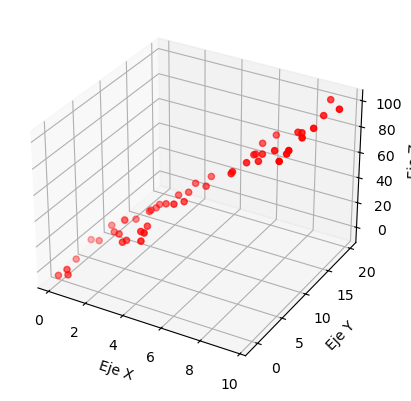

In [37]:
def covariance(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    return  np.sum((x - mean_x)*(y - mean_y)) / len(x)

def desviacion_std(x):
    mean_x = np.mean(x)
    return np.sqrt(np.sum((x - mean_x)**2) / len(x))
    
#Con correlacion positiva 
x = np.random.rand(50) * 10  # Variable X
y = 2 * x + np.random.normal(0, 1, 50)  # Variable Y con relación lineal con X
z = 5 * y + np.random.normal(0, 1, 50)
#Con correlacion cero
x_0 = np.random.rand(50) * 10  # Variable X
y_0 = np.random.rand(50) * 10  # Variable Y sin relación con X o Z
z_0 = np.random.rand(50) * 10  # Variable Z sin relación con X o Y
#Con correlación negativa
x_neg = np.random.rand(50) * 10  # Variable X
y_neg = -2 * x_neg + np.random.normal(0, 1, 50)  # Variable Y con relación negativa con X
z_neg = 5 * y_neg + np.random.normal(0, 1, 50)  # Variable Z con relación negativa con Y

def covariance_corr(x,y,z):
    std_x = np.std(x)
    std_y = np.std(y)
    std_z = np.std(z)


    df = pd.DataFrame({'X':x, 'Y':y, 'Z':z})
    variables = ['X', 'Y', 'Z']

    matriz_cov = []
    matriz_corr = []
    for variable in variables:
        cov_list = []
        corr_list = []
        for v in variables:
            cov = df[variable].cov(df[v])
            sigma_x = desviacion_std(df[variable])
            sigma_y = desviacion_std(df[v])
            corr_list.append(cov / (sigma_x * sigma_y))
            cov_list.append(cov)
        matriz_cov.append(cov_list)
        matriz_corr.append(corr_list)
    matriz_cov = np.array(matriz_cov)
    print()
    print(f"Matriz cov con iteraciones:\n{matriz_cov}")
    rprint(matriz_corr)

    for variable in variables:
        for v in variables:
            print(variable,v, end=' - ', sep='')
        print()
    print()
    print(f"std de x: {std_x}")
    print(f"std de y: {std_y}")
    print(f"std de z: {std_z}")

    print()

    print(f"covarianza xy: {matriz_cov[0][1]}")
    print(f"covarianza xz: {matriz_cov[0][2]}")
    print(f"covarianza yz: {matriz_cov[1][2]}")

    # Crear la figura y el eje 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos
    ax.scatter(x, y, z, c='r', marker='o')

    # Etiquetas de los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')

    plt.show()

A = np.stack((x,y,z))                                           # shape -> (3, 50)
mean_A = np.mean(A, axis=1).reshape((A.shape[0],1))             # shape -> (3, 1)
mean_A = np.tile(mean_A, (1, A.shape[1]))                       # shape -> (3, 50)
Z = A - mean_A                                                  # shape -> (3, 50)
Z_T = Z.T                                                       # shape -> (50, 3)
matrix_cov = Z @ Z_T                                            # shape -> (3, 3)
matrix_cov /= (A.shape[1] - 1)                                  # shape -> (3, 3)
print(f"Matriz cov con operaciones sobre matrices:\n{matrix_cov}")
print()
print(f"Matriz cov con metodo de numpy:\n{np.cov(A)}")
covariance_corr(x,y,z)


#covariance_corr(x_0,y_0,z_0)
#covariance_corr(x_neg,y_neg,z_neg)

**Experimento**

Proceso mediante el cual se obtiene una observación o medición.

**Evento simple**

Es el resultado que se observa de una sola repetición del experimento, el cual podemos denotar con una letra **E<sub>i</sub>** en donde su subindice indica el numero del evento simple.

**Evento**

Es un conjunto de eventos sencillos.

**Eventos mutuamente excluyentes**

Ambos son mutuamente excluyentes si, cuando ocurren un evento, los otros no pueden ocurrir y viceversa. No pueden ocurrir simultaneamente.

**Espacio muestral**

Es el conjunto de todos los eventos sencillos y se utiliza **S** para representar al espacio muestral


$$ Frecuencias relativa = \frac{Frecuencia}{n} $$
donde n es el numero repeticiones del experimento
si las repeticiones tienden a infinito entonces, en ultima instancia se genera toda la población
$$ P(A) = \lim_{n \to \infty} \frac{Frecuencia}{n} $$
* P(A) esta entre 1 y 0 
* P(A) = 0 entonces el evento nunca ocurre
* P(A) = 1 entonces el evento siempre ocurre 
* Entonces mientras P(A) este mas cerca de 1 entonces es más probable que el evento ocurra y si es mas cercano a 0 entonces es menos probable que el evento ocurra 


**Consideraciones para las probabilidades de un evento simple**

* Cada probabilidad debe estar entre 0 y 1
* La suma de todos los eventos sencillos en **S** es igual a 1

**Probabilidad de un evento A**

La probabilidad de un evento A es igual a la suma de las probabilidades de los eventos sencillos contenidos en A

**Calculo de la probabilidad de un evento**
* Hacer una lista de todos los eventos sencillos dentro del espacio muestral.
* Asignar una probabilidad adecuada a cada evento simple.
* Determinar cuáles eventos sencillos resultan en un evento de interés.
* Sumar las probabilidades de los eventos sencillos que resulten en el evento de interes
$$ P(A) = \frac{n_a}{N} $$
Donde n<sub>a</sub> es el numero de evento sencillos dentro del evento de interés.


**La regla mn**

Considere un experimento que se realiza en dos etapas. Si la primera etapa se puede efectuar en **m** formas y, para cada una de éstas, la segunda etapa se puede lograr en **n** formas, entonces hay **mn** formas para efectuar el experimento 

**La regla mn extendida**
Si un experimento se realiza en k etapas, con n<sub>1</sub> formas para efectuar la primera etapa, n<sub>2</sub> formas para efectuar la segunda etapa, ... , y n<sub>k</sub> formas para efectuar la k-ésima etapa, entonces el número de formas para efectuar el experimento es
$$ n_1n_2n_3 \cdot \cdot \cdot n_k$$

**Una regla de conteo para permutaciones**
El número de formas en que podemos acomodar **n** objetos distintos, tomándolos una cantidad r a la vez, es 
$$ p_{r}^{n} = \frac{n!}{(n-r)!}$$
donde n! = n(n - 1)(n - 2) &middot; &middot; &middot; (n - r + 1)
$$ \frac{n!}{(n - r)!} = \frac{n(n - 1)(n - 2) \cdot \cdot \cdot (n - r + 1)(n- r) \ldots (2)(1)}{(n - r)\ldots (2)(1)} $$
$$ = n(n - 1)\ldots (n - r + 1) $$

**Regla de conteo para combinaciones**

El número de combinaciones distintas de n objetos distintos que se pueden formar tomando r de ellos a un tiempo, es 
$$ C_{r}^{n} = \frac{n!}{r!(n - r)!} $$
El numero de combinaciones y el número de permutaciones están relacionados:
$$ C_{r}^{n} = \frac{P_{r}^{n}}{r!} $$

**Union**

La unión de los eventos A y B, denotada por A&cup;B, es el evento en que ocurren A o B o ambos

**Intersección**

La intersección de eventos A y B, denotada por A&cap;B, es el evento en que ocurren A y B

**Complemento**

El complemento de un evento A,, denotado por A<sup>c</sup>, es el evento en que A no ocurre.

**Regla de adición**

Dados dos eventos, A y B, la probabilidad de su unión, A&cup;B, es igual a
$$ P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

Dado en caso de que los eventos **A** y **B** sean mutuamente excluyentes, entonces la interseccion **A&cup;B** = 0 y la regla de la adición se simplifica a

$$ P(A \cup B) = P(A) + P(B) $$

**Regla para complementos**
$$ P(A^{c}) = 1 - P(A) $$
**Independencia**

Dos evento, **A** y **B**, son independientes si y sólo si la probabilidad del evento **B** no está influenciada o cambiada por el suceso del evento **A**, o viceversa.

**Regla general de la multiplicidad**

La probabilidad de que **A** y **B** ocurran cuando el experimento se realiza es
$$ P(A \cap B) = P(A)P(B|A) $$
o
$$ P(A \cap B) = P(B)P(A|B) $$



**Probabilidades condicionales**

La probabilidad condicional del evento **A**, dado que el evento **B** ha ocurrido, es
$$ P(A|B) = \frac{P(A \cap) B}{P(B)} \qquad si \qquad P(B) \ne 0 $$
La probabilidad condicional del evento **B**, dado que el evento **A** ha ocurrido, es
$$ P(B|A) = \frac{P(A \cap B)}{P(A)} \qquad si \qquad P(A) \ne 0$$

Cuando dos eventos son **independientes**, es decir, si la probabilidad del evento **B** es igual, ya sea que el evento **A** haya o no haya ocurrido, entonces el evento **A** no afecta al evento **B** y entonces 
$$ P(B|A) = P(B) $$


**La regla de la multiplicación para eventos independientes**

Si dos eventos **A** y **B** son independientes, la probabilidad de que ocurran **A** y **B** es 
$$ P(A \cap B) = P(A)P(B) $$
Del mismo modo, si **A**, **B** y **C** son eventos mutuamnete independiente (todos los pares de eventos son independientes), entonces a probabilidad de que **A**,**B** y **C** ocurran es
$$ P(A \cap B) = P(A)P(B)P(C) $$

**Verificación de independencia**

Se dice que dos eventos **A** y **B** son **independientes** si y sólo si
$$ P(A \cap B) = P(A)P(B) $$
o bien.
$$ P(B|A) = P(B) $$
De otro modo, se dice que los eventos son **dependientes**